<a href="https://colab.research.google.com/github/Ruqyai/ds/blob/master/unit3/titanic-survivors/tuning_titanic_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


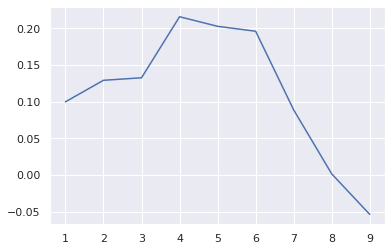

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz


dataset = pd.read_csv('titanic.csv')


# Check if there are any missing values
# sns.set()
# sns.heatmap(dataset.isnull(), cmap='viridis')
# plt.show()

# Missing values are found in Age and Cabin columns. We can solve Age only by fill them with the median
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())

# Feature Engineering
features = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
target = dataset['Survived']

# Split dataset into training set and test set 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(dataset[features], target, test_size=0.3, random_state=0)


max_depth_range = list(range(1, 10))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeRegressor(max_depth=depth,
                                 random_state=0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)

sns.set()
sns.lineplot(max_depth_range, accuracy)
plt.show()